# Contents 

01. Importing libraries
02. Importing data
03. Data check
04. Linear regression 
    * Total energy for space heating vs total energy cost
    * Total energy for space heating vs total energy use 
05. Removing outliers from regression model 

## 01. Importing libraries 

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [2]:
%matplotlib inline

## 02. Importing data 

In [3]:
# importing by using os.path.join() function 

path = r'/Users/lindazhang/RECS Analysis'
df_recs = pd.read_csv(os.path.join(path, '02 Datasets', 'Original Data', '2015_RECS_data.csv'), index_col = False)

In [4]:
# Creating a subset 

subset = df_recs[['TOTALBTU','BTUELCOL','TOTALBTUSPH','TOTALBTUWTH','TOTALDOL']]
# renaming columns 

dict = {'TOTALBTU': 'total_energy_usage',  
'BTUELCOL': 'total_air_conditioning_usage',
'TOTALBTUSPH': 'total_space_heating_usage',
'TOTALBTUWTH': 'total_water_heating_usage',
'TOTALDOL': 'total_energy_cost'}

subset.rename(columns = dict, inplace = True)


subset

/var/folders/j6/vcs2ps6j3pl6z1p5390gh8h00000gn/T/ipykernel_3236/362346698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.rename(columns = dict, inplace = True)


,total_energy_usage,total_air_conditioning_usage,total_space_heating_usage,total_water_heating_usage,total_energy_cost
0,48974.570,6795.016,12469.727,17535.625,1406.10
1,41534.000,7587.322,11570.020,7129.985,1366.00
2,96548.160,23328.992,23499.517,18444.442,2828.84
3,89284.345,12061.243,52408.189,8077.839,2102.98
4,36582.146,1135.176,5339.841,17331.011,910.89
...,...,...,...,...,...
5681,28839.497,489.049,11714.119,10489.378,514.00
5682,22424.616,2914.911,6426.518,3592.141,761.15
5683,12323.219,534.711,1234.343,3274.642,481.24
5684,47673.902,11509.348,9796.509,6341.950,1626.78


## 03. Data Check

In [5]:
# Check for missing values

subset.isnull().sum()

# No missing values to handle

total_energy_usage              0
total_air_conditioning_usage    0
total_space_heating_usage       0
total_water_heating_usage       0
total_energy_cost               0
dtype: int64

In [6]:
# checking for duplicates

dups = subset.duplicated()
dups.shape # No dups

(5686,)

In [7]:
# exporting subset as excel file into prepared data folder 

subset.to_excel(os.path.join(path, '02 Datasets','Prepared Data', 'linear_regression_subset.xlsx'))

## 04. Linear regression models

### Total energy for space heating vs total energy cost

Correlation analysis had indicated that space heating usage has a strong relationship with total household energy consumption. 

I'd like to test the following hypothesis:
As total energy used for space heating increases, total energy cost increases. 

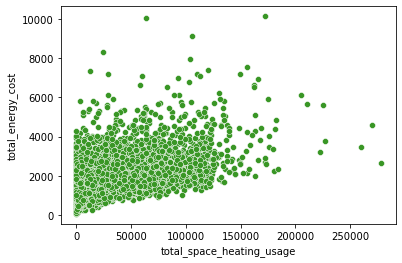

In [8]:
# Create a scatterplot to look at total energy for space heating vs total energy cost

scatter = sns.scatterplot(x = 'total_space_heating_usage', y = 'total_energy_cost', data = subset, color = '#399625')

In [9]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = subset['total_space_heating_usage'].values.reshape(-1,1)
y = subset['total_energy_cost'].values.reshape(-1,1)

In [10]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
# Create a regression object.

regression = LinearRegression()

In [12]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [13]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

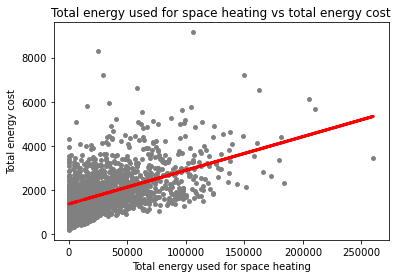

In [14]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total energy used for space heating vs total energy cost')
plot_test.xlabel('Total energy used for space heating')
plot_test.ylabel('Total energy cost')
plot_test.show()

In [15]:
# Create objects that contain the model summary statistics.

mse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [16]:
# Evaluate and print model performance  

print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[0.01523983]]
Mean squared error:  724640.1192512744
R2 score:  0.2686078435229555


The mean squared error tells us the average squared distance between the observed data values and the predicted data values. A mean squared error of 724640 is very high given our data so we can conclude that the regression model may not be the best model to predict the influence of total energy used for space heating on total energy cost. 

The r squared value tells us the proportion of the variance in the dependant variable that can be explained by the independent variable and its value can fall between 0 and 1. The closer an r squared value is to 1, the better the model fits the data. In this case, an r squared of 0.268 tells us that the model is not fitting the data well. 

### Total energy for space heating vs total energy use 

Since I was unable to create a regression model that can predict the variance in total energy cost based on total energy used for space heating, I'd like to see if I can create a regression model that can predict the influence of total energy used for space heating on total energy use. 


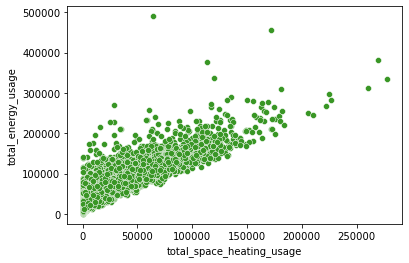

In [17]:
# Create a scatterplot to look at total energy for space heating vs total energy use

scatter = sns.scatterplot(x = 'total_space_heating_usage', y = 'total_energy_usage', data = subset, color = '#399625')

In [18]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = subset['total_space_heating_usage'].values.reshape(-1,1)
y = subset['total_energy_usage'].values.reshape(-1,1)

In [19]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
# Create a regression object.

regression = LinearRegression()

In [21]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

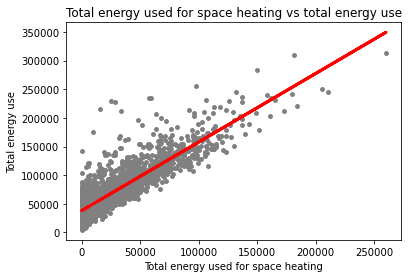

In [23]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total energy used for space heating vs total energy use')
plot_test.xlabel('Total energy used for space heating')
plot_test.ylabel('Total energy use')
plot_test.show()

In [24]:
# Create objects that contain the model summary statistics.

mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted) 

In [25]:
# Evaluate model performance  

print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[1.19717366]]
Mean squared error:  549961755.5631884
R2 score:  0.7376180423596104


The mean squared error and r squared value for this regression model is better than the previous model. The lower mean squared error reflects that the model is better fitting the data and the 0.74 r squared value means that 74% of the variance in total energy use can be explained by total energy used for space heating. 

It appears that total energy used for space heating is a better predictor of total energy use than of total energy cost. This is probably because there are many more variables that can influence energy cost that are not included in this linear regression model. 

In [26]:
# extracting p values of regression model using statsmodel 

#define response variable
y = subset['total_energy_usage']

#define predictor variables
x = subset ['total_space_heating_usage']

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_energy_usage   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                 1.555e+04
Date:                Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:25:47   Log-Likelihood:                -65485.
No. Observations:                5686   AIC:                         1.310e+05
Df Residuals:                    5684   BIC:                         1.310e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

Using the statsmodels module, we obtained an r squared of 0.73 which is very close to the r-squared value calculated by scikit-learn. 

The p-value of total space heating usage is 0.00 which is lower than our significance level of 0.05, confirming that there is a statistically significant relationship between total energy used for space heating and total household energy consumption. 

The p-value of the F-statistic is 0.00, indicating the regression model provides a better fit to the data than a model that contains no predictor variables. 

## 05. Removing outliers from regression model 


To try to improve the performance of the total energy for space heating vs total energy use regression model, I am going to remove outliers using IQR. 

In [27]:
# function to find outliers using IQR

def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [28]:
# find total_energy_use outliers 

total_energy_outliers = find_outliers_IQR(subset['total_energy_usage'])

total_energy_outliers.sort_values()



4799    195894.664
2078    195999.644
1494    196239.307
2038    196536.383
1968    196587.219
           ...    
3834    338256.041
5016    376700.787
82      381971.432
739     457174.198
1089    490187.407
Name: total_energy_usage, Length: 117, dtype: float64

In [29]:
# print the minimum, maximum, and number of outliers 

print('minimum outlier: ' ,total_energy_outliers.min())
print('maximum outlier: ' ,total_energy_outliers.max())
print('number of outliers: ',len(total_energy_outliers))

minimum outlier:  195894.664
maximum outlier:  490187.407
number of outliers:  117


In [30]:
# find outliers in total_space_heating_usage column

BTU_SPH_outliers = find_outliers_IQR(subset['total_space_heating_usage'])

BTU_SPH_outliers.sort_values()

5016    113098.241
2445    113111.791
3624    113113.415
2154    113239.106
3141    113281.580
           ...    
1751    225135.643
1244    226807.009
5612    260105.751
82      269364.733
4790    277614.771
Name: total_space_heating_usage, Length: 180, dtype: float64

In [31]:
# print the minimum, maximum, and number of outliers 

print('minimum outlier: ' ,BTU_SPH_outliers.min())
print('maximum outlier: ' ,BTU_SPH_outliers.max())
print('number of outliers: ',len(BTU_SPH_outliers))

minimum outlier:  113098.241
maximum outlier:  277614.771
number of outliers:  180


In [32]:
# return dataframe of all rows instead of just the outliers. 
# If the value is not an outlier, it will display as NaN (not a number):

outliers = find_outliers_IQR(subset[['total_energy_usage','total_space_heating_usage']])

outliers

,total_energy_usage,total_space_heating_usage
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
5681,NaN,NaN
5682,NaN,NaN
5683,NaN,NaN
5684,NaN,NaN


In [33]:
#function to drop outliers 
#function creates a dataframe named not_outliers that replaces the outlier values with a NULL 
#then uses .dropna() to drop the rows with NULL values. 


def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.dropna().reset_index()
   return outliers_dropped

In [34]:
outliers_dropped = drop_outliers_IQR(subset[['total_energy_usage','total_space_heating_usage']])

outliers_dropped

,index,total_energy_usage,total_space_heating_usage
0,0,48974.570,12469.727
1,1,41534.000,11570.020
2,2,96548.160,23499.517
3,3,89284.345,52408.189
4,4,36582.146,5339.841
...,...,...,...
5456,5681,28839.497,11714.119
5457,5682,22424.616,6426.518
5458,5683,12323.219,1234.343
5459,5684,47673.902,9796.509


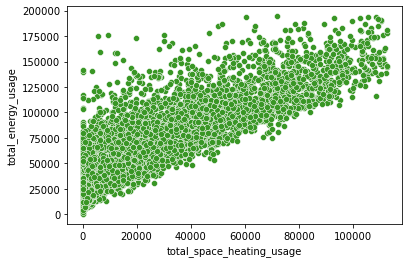

In [35]:
# New scatterplot to look at total energy for space heating vs total energy use without outliers 

scatter = sns.scatterplot(x = 'total_space_heating_usage', y = 'total_energy_usage', data = outliers_dropped, color = '#399625')

In [36]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = outliers_dropped['total_space_heating_usage'].values.reshape(-1,1)
y = outliers_dropped['total_energy_usage'].values.reshape(-1,1)

In [37]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [38]:
# Create a regression object.

regression = LinearRegression()

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

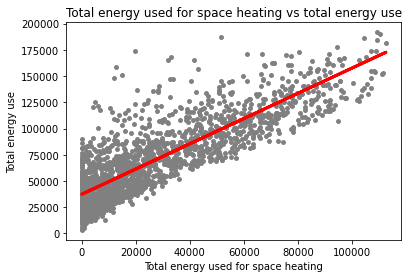

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total energy used for space heating vs total energy use')
plot_test.xlabel('Total energy used for space heating')
plot_test.ylabel('Total energy use')
plot_test.show()

In [42]:
# Create objects that contain the model summary statistics.

mse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [43]:
# Evaluate model performance  

print('Slope:' ,regression.coef_)
print('Mean squared error: ', mse)
print('R2 score: ', r2)

Slope: [[1.20360671]]
Mean squared error:  447981495.2721435
R2 score:  0.6920086934990495


Dropping outliers actually decreased the performance of the regression model. The r squared changed from 0.74 to 0.69. 